Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [117]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [118]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [119]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train/")
data_dir_test = pathlib.Path("Test/")

In [120]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [121]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [122]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using 
## tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size 
## img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='Train/',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [123]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='Train/',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [124]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [125]:
skin_cancer_classes = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus',
                       'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma',
                       'vascular lesion']

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

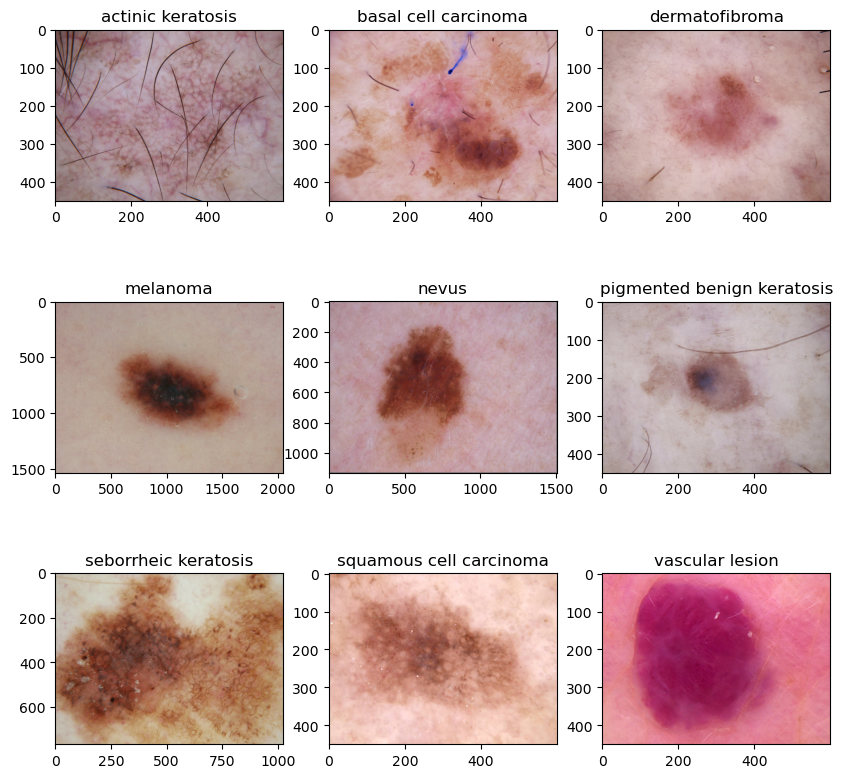

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [127]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [128]:
### Your code goes here
# Define the CNN model architecture
num_classes = len(class_names)
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),    
    layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])

# the Sequential class is used to define the model architecture. 
# The Rescaling layer is used to normalize pixel values between (0,1). 
# The Conv2D layers are used to define the convolutional layers, 
# and the MaxPool2D layers are used to define the pooling layers. 
# The Dropout layer is used to prevent overfitting, 
# and the Dense layer is used to define the output layer with the softmax activation function.


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [129]:
### Todo, choose an appropirate optimiser and loss function
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [130]:
# View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 180, 180, 32)      2432      
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

### Train the model

In [131]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\errav\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 94s 2s/step - loss: 2.0645 - accuracy: 0.1780 - val_loss: 2.0529 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 84s 2s/step - loss: 2.0245 - accuracy: 0.2031 - val_loss: 2.0341 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 84s 1s/step - loss: 2.0269 - accuracy: 0.2148 - val_loss: 2.0266 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 84s 2s/step - loss: 2.0204 - accuracy: 0.2143 - val_loss: 2.0260 - val_accuracy: 0.2036
Epoch 5/20
56/56 [==============================] - 84s 1s/step - loss: 2.0178 - accuracy: 0.1959 - val_loss: 2.0451 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 55s 969ms/step - loss: 2.0084 - accuracy: 0.2081 - val_loss: 2.0621 - val_accuracy: 0.2103
Epoch 7/20
56/56 [==============================] - 62s 1s/step - loss: 1.9943 - accuracy: 0.2104 - val_loss: 2.0425 - val_accuracy: 0.2103
Epoch 8/20
56/56 [==========

### Visualizing training results

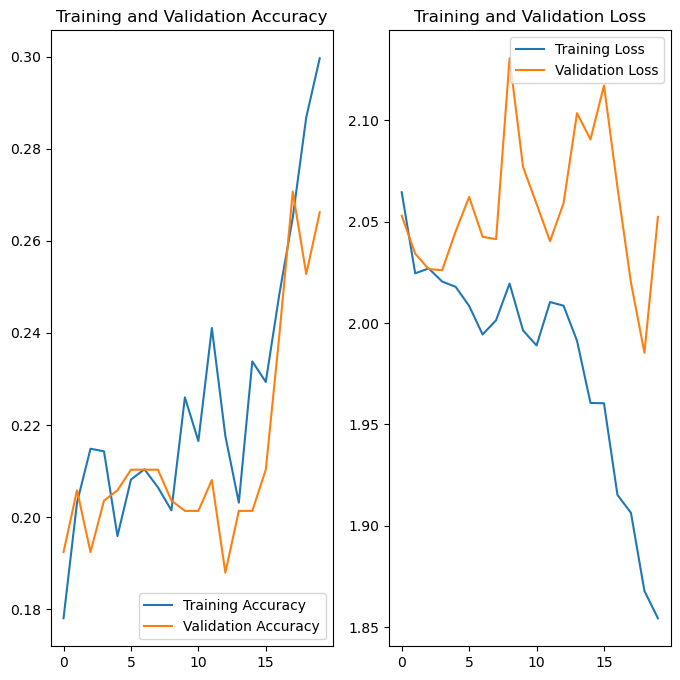

In [132]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [133]:
# Todo, after you have analysed the model fit history for presence of underfit 
# or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

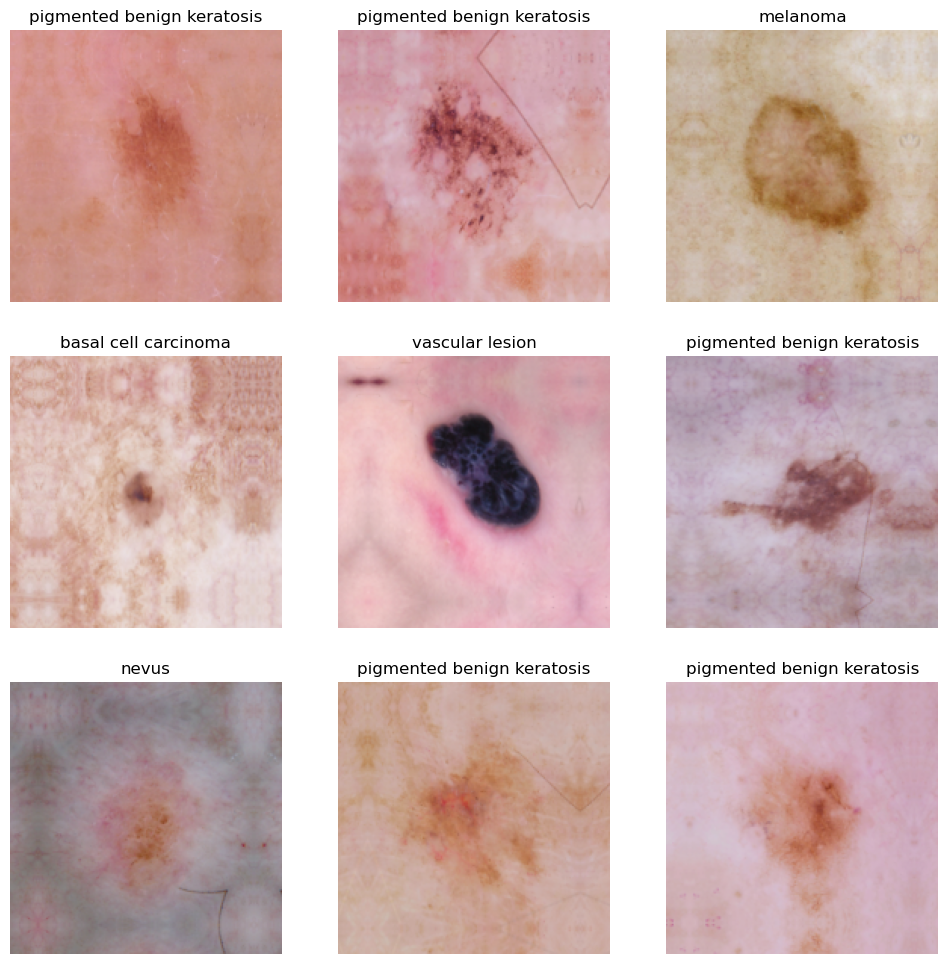

In [134]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [135]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [136]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [137]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 88s 2s/step - loss: 2.0040 - accuracy: 0.2589 - val_loss: 1.7501 - val_accuracy: 0.3870
Epoch 2/20
56/56 [==============================] - 106s 2s/step - loss: 1.7716 - accuracy: 0.3694 - val_loss: 1.7206 - val_accuracy: 0.4251
Epoch 3/20
56/56 [==============================] - 91s 2s/step - loss: 1.6612 - accuracy: 0.4074 - val_loss: 1.6248 - val_accuracy: 0.4116
Epoch 4/20
56/56 [==============================] - 75s 1s/step - loss: 1.6644 - accuracy: 0.3956 - val_loss: 1.7753 - val_accuracy: 0.3758
Epoch 5/20
56/56 [==============================] - 78s 1s/step - loss: 1.6779 - accuracy: 0.3878 - val_loss: 1.5902 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 87s 2s/step - loss: 1.6523 - accuracy: 0.4124 - val_loss: 1.6656 - val_accuracy: 0.4452
Epoch 7/20
56/56 [==============================] - 76s 1s/step - loss: 1.6029 - accuracy: 0.4141 - val_loss: 1.6530 - val_accuracy: 0.4072
Epoch 8/20
56/56 [=

### Visualizing the results

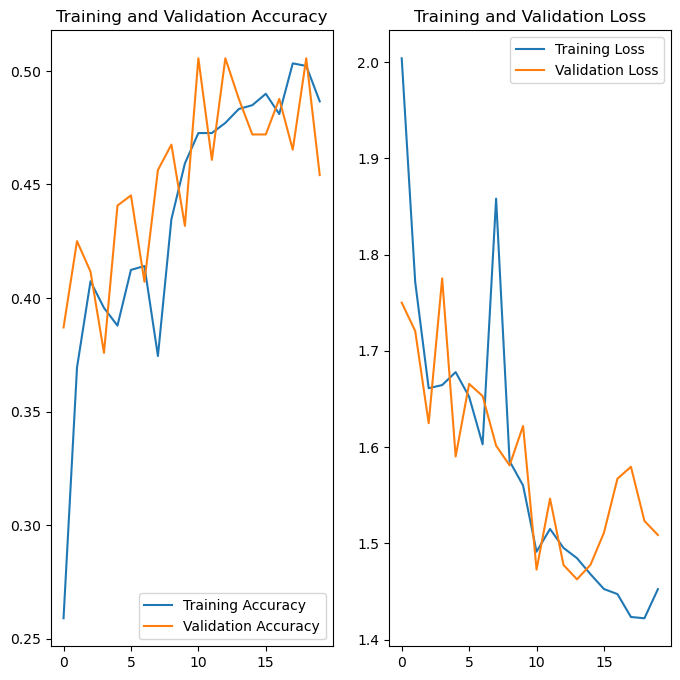

In [138]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

To determine whether the model is overfitting or underfitting, we need to compare the training and validation accuracy. If the training accuracy is significantly higher than the validation accuracy, it is likely that the model is overfitting. Conversely, if both the training and validation accuracy are low, it is likely that the model is underfitting 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [139]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


In [140]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


<BarContainer object of 9 artists>

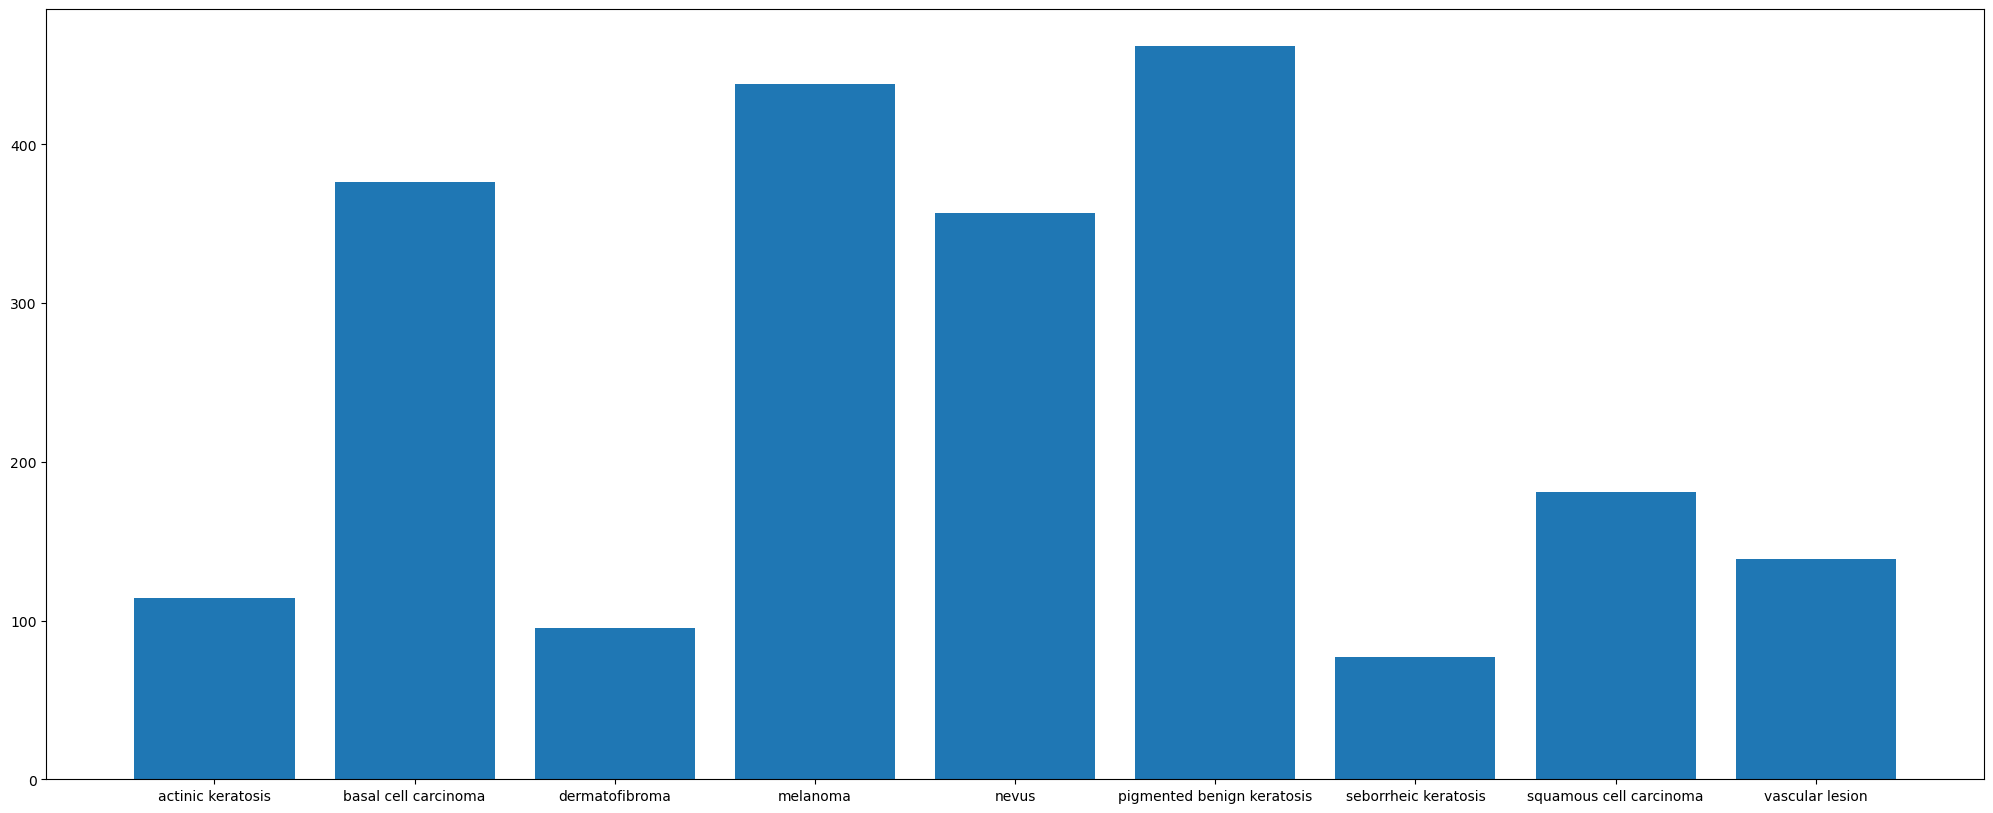

In [141]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [142]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [169]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [173]:
#path_to_training_dataset="/content/drive/MyDrive/Cancer Detection /Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("Train/",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x193CB768ED0>: 100%|██████████| 500/500 [00:24<00:00, 20.19 Samples/s]  


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x193CE2BD9D0>: 100%|██████████| 500/500 [00:31<00:00, 15.85 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x193D00523D0>: 100%|██████████| 500/500 [00:34<00:00, 14.35 Samples/s]                   


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x193CFD85610>: 100%|██████████| 500/500 [00:31<00:00, 15.74 Samples/s]                  


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x193CE4C8CD0>: 100%|██████████| 500/500 [00:28<00:00, 17.43 Samples/s]  


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x193CB5D9CD0>: 100%|██████████| 500/500 [00:32<00:00, 15.47 Samples/s]  


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x193CBD64690>: 100%|██████████| 500/500 [00:28<00:00, 17.38 Samples/s]                   


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x193CE52A4D0>: 100%|██████████| 500/500 [00:27<00:00, 18.16 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x193D017B0D0>: 100%|██████████| 500/500 [00:30<00:00, 16.25 Samples/s]  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [174]:
data_dir_train = pathlib.Path("Train/output")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [175]:
# distribution of classes in the data
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,Train\output\actinic keratosis\actinic keratos...,actinic keratosis
1,Train\output\actinic keratosis\actinic keratos...,actinic keratosis
2,Train\output\actinic keratosis\actinic keratos...,actinic keratosis
3,Train\output\actinic keratosis\actinic keratos...,actinic keratosis
4,Train\output\actinic keratosis\actinic keratos...,actinic keratosis
...,...,...
4495,Train\output\vascular lesion\vascular lesion_o...,nevus
4496,Train\output\vascular lesion\vascular lesion_o...,nevus
4497,Train\output\vascular lesion\vascular lesion_o...,nevus
4498,Train\output\vascular lesion\vascular lesion_o...,nevus


In [176]:
new_df['Label'].value_counts()

Label
melanoma                      1344
basal cell carcinoma          1133
nevus                          517
pigmented benign keratosis     462
actinic keratosis              356
dermatofibroma                 291
squamous cell carcinoma        181
vascular lesion                139
seborrheic keratosis            77
Name: count, dtype: int64

In [194]:
#import glob
#path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [195]:
#lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [196]:
#dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [197]:
#df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [198]:
new_df['Label'].value_counts()

Label
melanoma                      1344
basal cell carcinoma          1133
nevus                          517
pigmented benign keratosis     462
actinic keratosis              356
dermatofibroma                 291
squamous cell carcinoma        181
vascular lesion                139
seborrheic keratosis            77
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [199]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [218]:
data_dir_train=pathlib.Path("Train/")
data_dir_train

WindowsPath('Train')

In [219]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [232]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train=pathlib.Path("Train/output/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [233]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [234]:
## begain with model creation
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [235]:
## compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [236]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
113/113 [==============================] - 263s 2s/step - loss: 2.0422 - accuracy: 0.1975 - val_loss: 2.0168 - val_accuracy: 0.2011
Epoch 2/50
113/113 [==============================] - 301s 3s/step - loss: 2.0225 - accuracy: 0.2108 - val_loss: 2.0174 - val_accuracy: 0.2022
Epoch 3/50
113/113 [==============================] - 306s 3s/step - loss: 2.0698 - accuracy: 0.2100 - val_loss: 2.0286 - val_accuracy: 0.2022
Epoch 4/50
113/113 [==============================] - 340s 3s/step - loss: 2.0196 - accuracy: 0.2022 - val_loss: 2.0156 - val_accuracy: 0.2022
Epoch 5/50
113/113 [==============================] - 358s 3s/step - loss: 2.0077 - accuracy: 0.2078 - val_loss: 2.0138 - val_accuracy: 0.2022
Epoch 6/50
113/113 [==============================] - 369s 3s/step - loss: 2.0211 - accuracy: 0.2039 - val_loss: 2.0273 - val_accuracy: 0.2078
Epoch 7/50
113/113 [==============================] - 320s 3s/step - loss: 2.0246 - accuracy: 0.2011 - val_loss: 2.0125 - val_accuracy: 0.2011

#### **Todo:**  Visualize the model results

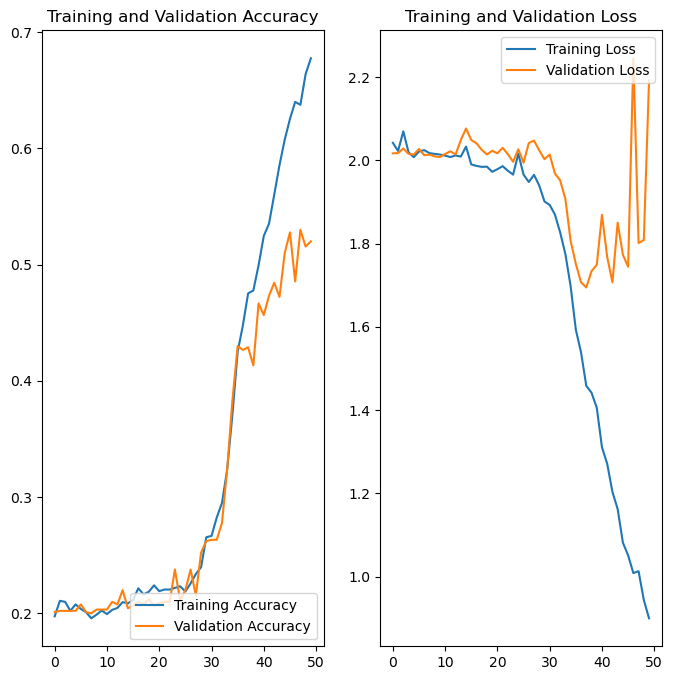

In [237]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Model is still overfitting, Overfitting in Convolutional Neural Networks (CNNs) is a common problem that occurs when the model is too complex for the problem it is trying to solve. This can be resolved by tuning the hyperparameters of the model and ensuring that the data is divided into well-proportioned sets. Here are some ways to treat overfitting in CNNs:

Reduce the complexity of the model: This can be done by removing certain layers or decreasing the number of neurons (filters in CNN). Use regularization: Regularization can be used on the weights of the model to prevent overfitting. Split the data: Splitting the data into training, validation, and testing datasets can help fine-tune the model until you’re satisfied with its performance.

Hyperparameter can be another key to solve it.